In [1]:
%matplotlib inline

import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
pd.options.mode.chained_assignment = None #default = 'warn'

sns.set(style="whitegrid")

# You may load the dataset from URL (instead of the local file) if you wish
auto_mpg_data = "https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/auto-mpg.data.txt"
auto_mpg_names = "https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/auto-mpg.names.txt"

In [2]:
columns = [
    'mpg', 
    'cylinders', 
    'displacement', 
    'horsepower',
    'weight', 
    'acceleration', 
    'model year',
    'origin', 
    'car name'
]

data = pd.read_csv(auto_mpg_data, sep='\s+', header=None, names=columns)

data_no_missing = data[data['horsepower'] != '?']
data_no_missing['horsepower'] = data_no_missing['horsepower'].astype('float64')
data = data.replace('?', '93.5')
data['horsepower'] = data['horsepower'].astype('float64')

In [3]:
def histogram_trio(data, variable_name, zoom=1.0):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    fewer_bins = int(len(bins) * .50)
    more_bins = int(len(bins) * 2)

    n, bins, patches = ax[1].hist(data[variable_name], color="DimGray", bins=bins, weights=empirical_weights) # <---
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_title(f"Relative Frequency Histogram of {variable_name}")
    ax[1].set_ylim((0, zoom))
    
    n, bins, patches = ax[0].hist(data[variable_name], color="DimGray", bins=fewer_bins, weights=empirical_weights)
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_title(f"Relative Frequency Histogram of {variable_name} (Fewer Bins)")
    
    n, bins, patches = ax[2].hist(data[variable_name], color="DimGray", bins=more_bins, weights=empirical_weights)
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel("Relative Frequency")
    ax[2].set_title(f"Relative Frequency Histogram of {variable_name} (More Bins)")

    plt.show()
    plt.close()

In [4]:
def histogram_w_whiskers(data, variable_name, zoom=None):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
        
    # start the plot: 2 rows, because we want the boxplot on the first row
    # and the hist on the second
    fig, ax = plt.subplots(
        2, figsize=(7, 5), sharex=True,
        gridspec_kw={"height_ratios": (.7, .3)}  # the boxplot gets 30% of the vertical space
    )

    # the histogram
    ax[0].hist(data[variable_name],bins=bins, color="dimgray", weights=empirical_weights)
    ax[0].set_title(f"{variable_name} distribution - Freeman Diaconis")
    ax[0].set_ylabel("Relative Frequency")
    if zoom:
        ax[0].set_ylim((0, zoom))
    # the box plot
    ax[1].boxplot(data[variable_name], vert=False)
    # removing borders
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_xlabel(variable_name)

    # and we are good to go
    plt.show()
    plt.close()
    return h

In [5]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    if h < 1:
        return 1
    return int( h)

$Weight$

Now we look at car weight. This is also a continuous, numeric variable. Typical car weight ranges are between 2,600 - 3,500 pounds - [how much does a car weigh?](https://www.insurancenavy.com/average-car-weight/). We expect larger cars to have bigger engines, and perhaps more cylinders. Since we already know the most common type of engine here is a 4-cylinder by a wide margin, I'd expect the weight distribution here to be closer to 2,600 than it is to 3,500. Let's see the summary statistics.

In [6]:
data['weight'].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

We have a mean of 2970 and a median of about 2803, slightly smaller. The 1st quartile is 2223, close to the median, while the third quartile is slightly further away at 3608. The max is 5140, while the min is only 1613. For our histogram, we expect to see a a slight right skewed histogram, with possible extreme values above the 3rd quartile.

Freeman Diaconis for weight: 10 bins


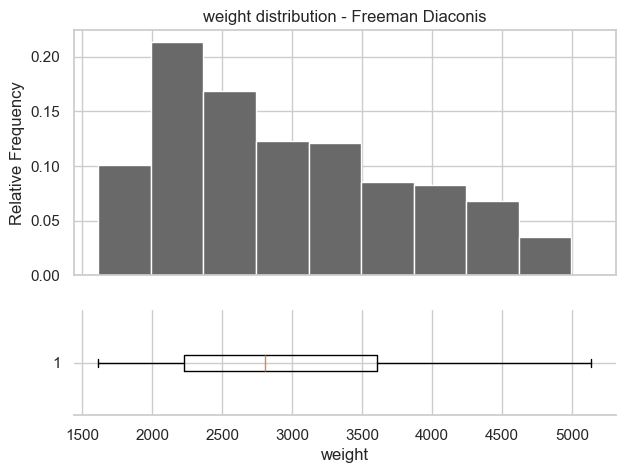

376

In [7]:
histogram_w_whiskers(data, 'weight')

Actually no extreme values, since the interquartile range of roughly 1,400 (and thus the 'whiskers') are fairly large to compensate. The most frequent weight is around 2,200, close to the 1st quartile, and the frequency steadily decreases as weight goes up from there. About 10% of the car weights are between the min (1613) and 2000. That seems interesting, since it doesn't fall into the same pattern.

Let's try changing bin sizes, maybe more bins can help clarify the low range of weights.

Freeman Diaconis for weight: 10 bins


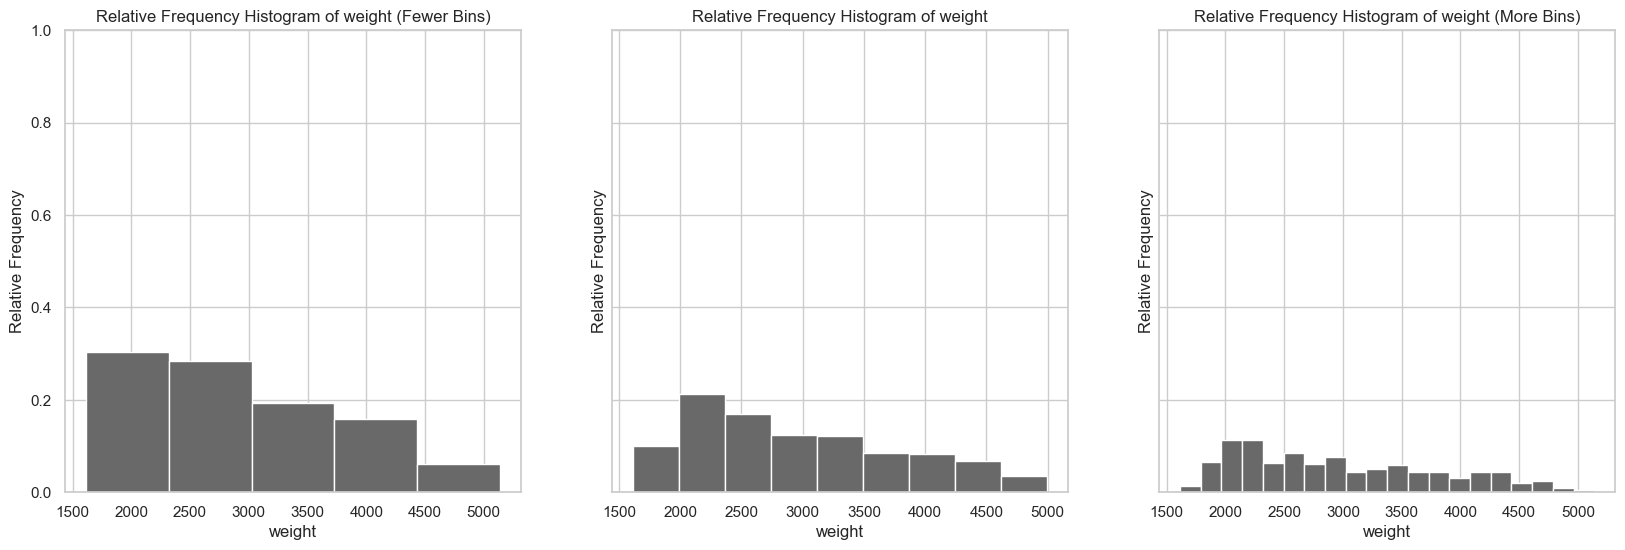

In [8]:
histogram_trio(data, 'weight')

Nothing too suspicious here, we see pretty much the same histogram as the initial plot. With less bins, we see the decreasing frquency pattern to include the lower weights, which looks nice but doesn't tell us much else unfortunately.

1. Cars that weigh more likely have bigger engines, use more $horsepower$, and thus could lead to lower $mpg$.

2. Again we expect auto makers to have certain quality control procedures, and could account for the decreasing proportion for larger weights, which might be for specialty vehicles.

3. It would be interesting to look at how some of the larger cars presented here compare to other types of vehicles such as schoolbuses and hospital vans.

### $Acceleration$

Acceleration is the rate at which a car can increase its speed (or rate the speed decreases if we talk about deceleration). Acceleration is a standard physics equation given by:

$Acceleration = \frac{\Delta v}{\Delta t}$, where

$\Delta v = Change \ in \ velocity$ <br>
$\Delta t = Change \ in \ time$

I couldn't find a good source on typical values for car acceleration, but found that this measurement, at least in the US, is typically measured by how fast a car can accelerate from 0-60 miles per hour. According to [Wikipedia](https://en.wikipedia.org/wiki/List_of_fastest_production_cars_by_acceleration), some of the fastest cars can have an acceleration time of only about 2 seconds, while more typical values might be closer to 10 seconds. 

This is also a continuous numeric variable, so let's view the summary statistics. I'd expect the most frequent values to be close to 10, give or take a few seconds.

In [9]:
data['acceleration'].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

We have a mean of 15.6 and standard deviation of 2.76. The min is 8 while the max is 24, not too large of a range. Our 1st quartile, median, and 3rd quartile are fairly tight at 13.8, 15.5, and 17.2, respectively. For our histogram, we expect a pretty symmetric plot, as our mean and median are nearly identical.

Freeman Diaconis for acceleration: 16 bins


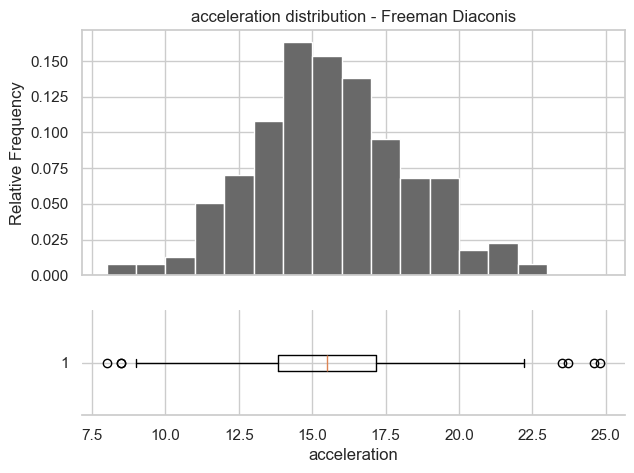

1

In [10]:
histogram_w_whiskers(data, 'acceleration')

We see a very symmetric histogram. There are a few extreme values on either side of the boxplot. Because we have such a small interquartile range, this is not unfounded. The values below about 11.0 and above 20.0 do show a dip on either side. Let's see if we can see any other interesting patterns by changing bin size.

Freeman Diaconis for acceleration: 16 bins


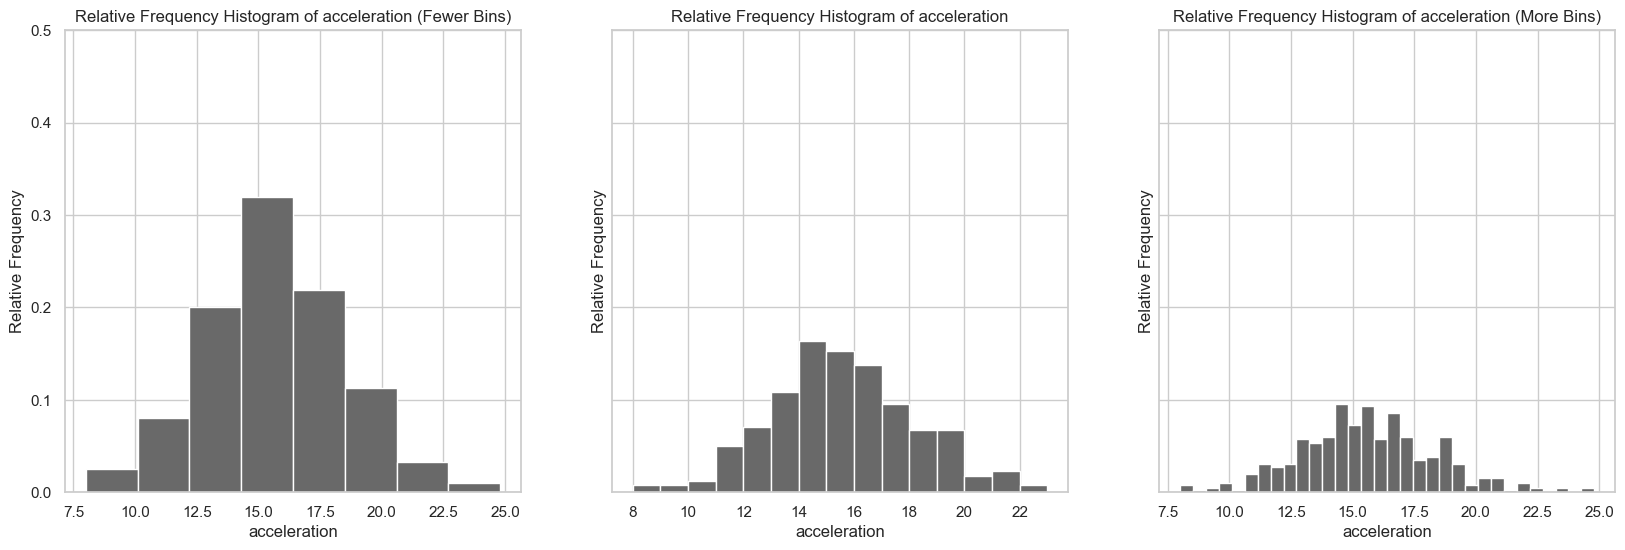

In [11]:
histogram_trio(data, 'acceleration', zoom=0.5)

Nothing too unusual here, this is just a simple, fairly symmetric histogram. 

1. Acceleration is not just dependent on the physics formula above, but we could consider $horsepower$ and maybe tire treads/friction as to how fast a car might accelerate - there are other unknown knowns and unknown unknowns that might play a role.

### $Model \ Year$

Let's look at model year. Similar to $cylinders$, this is a multi-valued, discrete variable. Although we will probably see a lot more variety in the values here than with $cylinders$. In general, I would expect cars made in later years to get better gas mileage, as technology has advanced steadily. Let's look at some summary statistics.

In [12]:
data['model year'].describe()

count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model year, dtype: float64

It looks like our mean is 76, same as the median. Min is 70, while the max is only 82. Clearly we are looking at the last 2 digits of year, and only cars between 1970 and 1982, so a 12 year span. The interquartile range is also fairly small because of this. Let's check the value counts to see how many values we have for each year.

In [13]:
data['model year'].value_counts().sort_index()

model year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: count, dtype: int64

A fairly even distribution over the range of $model \ year$. Most years have around 30 counts in this data set. We might consider applying the same principles here as we did with $cylinders$, where we considered it an ordered categorical variable. Because there are several more values here, I will simply move forward with the traditional histogram with whiskers and trio of histograms we look for with numerical variables.

Freeman Diaconis for model year: 12 bins


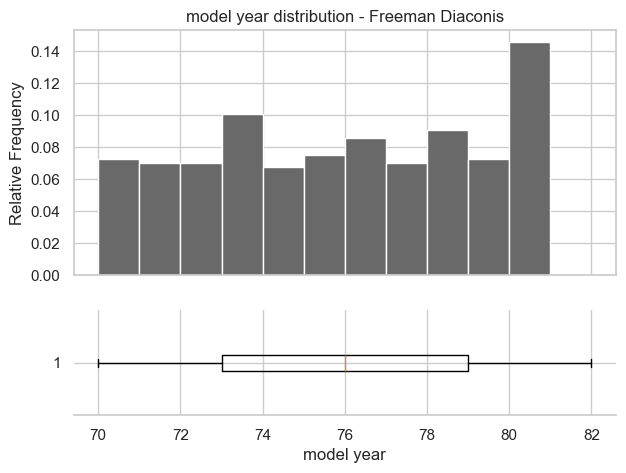

1

In [14]:
histogram_w_whiskers(data, 'model year')

We expected to see a slightly larger hump for 73, but not at 81. Notice that we have 13 discrete values for $model \ year$, but only 11 bins in this histogram. Likely, the last few values are being crunched together. Let's look at the trio of histograms to see if we can placate this abnormality. We also don't see any extreme values from the boxplot.

Freeman Diaconis for model year: 12 bins


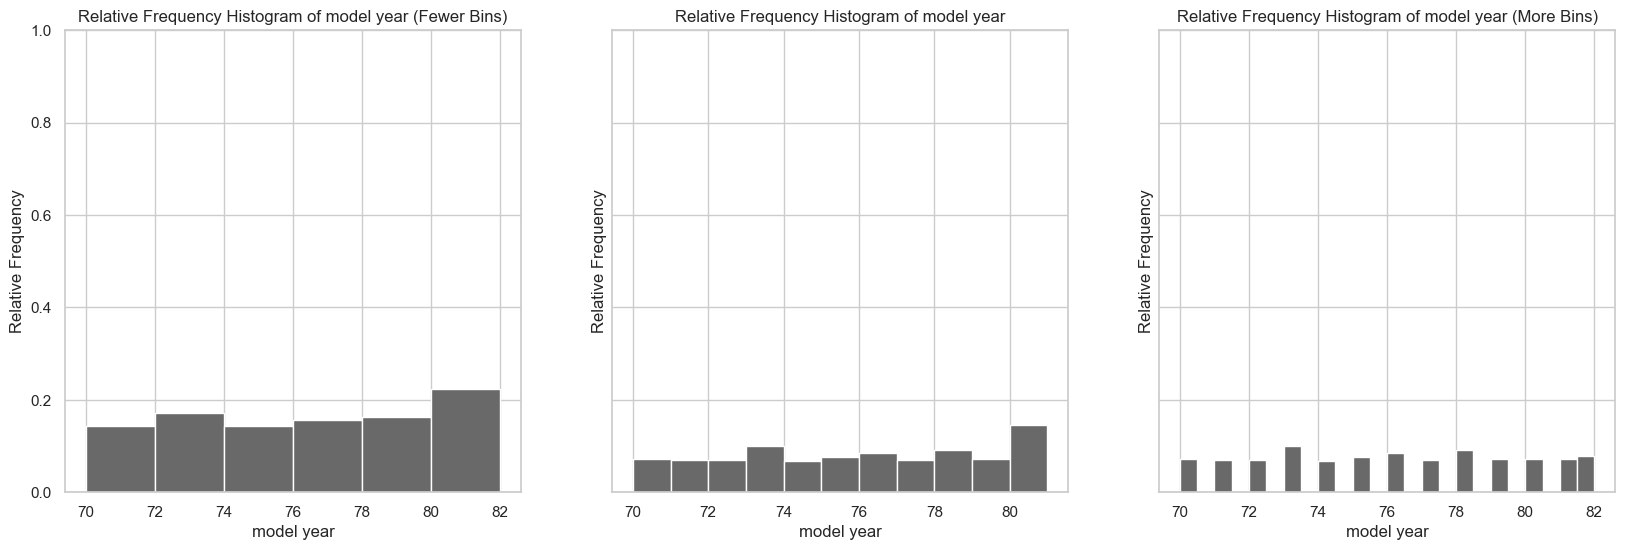

In [15]:
histogram_trio(data, 'model year', zoom=0.5)

The histogram with more bins helps I think. We know from looking at value counts that the years 79, 80, and 81 all have the same count (and thus the same relative frequency), while counts for 82 are barely higher - this is what we see in the histogram with more bins. The histograms with fewer bins are masking this a bit, which could lead to some confusion. That's why it's important we look at both the data and the plots here. In this case, it's important we choose the right bin size for our histogram.

1. Data for this dataset may have been chosen to represent a relatively even distribution of model years. If we had more time, I think it would be interesting to do pairwise analysis between $model \ year$ and some other variables, but I will stick with just the target variable for now.

2. We are only looking at a small range of years in this dataset, so we might not expect to see EDA analysis here that is consistent with newer cars in current decade.

### $Origin$

Next we have $origin$, and rightfully so. This is a multi-valued discrete variable, similar to what we just saw. We can start with some summary statistics to describe the values we have in this dataset.

In [16]:
data['origin'].describe()

count    398.000000
mean       1.572864
std        0.802055
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

Okay, so we have a mean of 1.57, and standard deviation of 0.8. What's interesting is that the min, 1st quartile, and median are all 1. The 3rd quartile is only 2, while max is 3. So essentially we only have 3 values here - 1, 2, or 3. We can confirm this with value counts.

In [17]:
data['origin'].value_counts().sort_index()

origin
1    249
2     70
3     79
Name: count, dtype: int64

Now what does 1, 2, or 3 actually mean? We know that cars can typically be described by manufacturer's country of origin (such as Toyota is a Japanese company), so it's likely that this variable is encoded as numeric, but should really be classified as categorical. I can't find online which countries these values actually represent (I know this set comes from Statlib, but can't seem to find the original), so we will just work with what we have. It seems that 1 might be America, 2 Europe, and 3 Asia, but since I don't have concrete evidence of this, I will work with 1, 2, and 3 for now.

We can treat this as a categorical variable, it shouldn't really be ordered as country of origin does not have an order unlike what we saw for $cylinders$. We see most of the cars come from country 1, while there's a pretty even split between countries 2 and 3. I think a bar chart will be suffcient for now, as we shouldn't expect to see anything super interesting or unexpected.

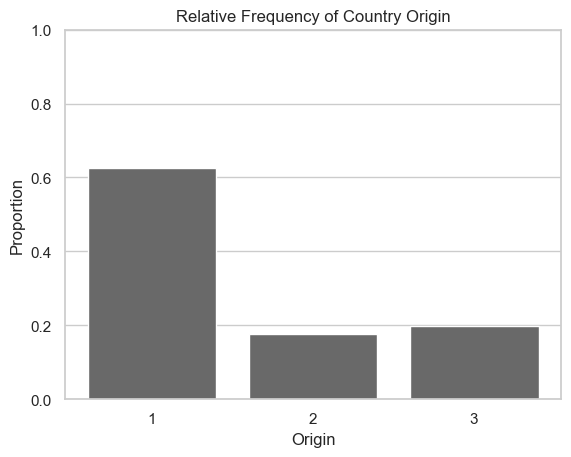

In [20]:
counts = data['origin'].value_counts().sort_index()
proportions = data['origin'].value_counts(normalize=True).sort_index()
x = sorted(data['origin'].unique())

plt.bar(x, proportions, color='dimgray')
plt.ylim((0, 1))
plt.grid(axis='x')
plt.xticks(x)

plt.xlabel('Origin')
plt.ylabel('Proportion')
plt.title('Relative Frequency of Country Origin')

plt.show()
plt.close()

A little over 60% of the cars come from country 1, while slightly less than 20% are from countries 2 and 3. Again, nothing with what the value counts didn't tell us.

1. This dataset presents as being US-centric with $origin$ and $acceleration$ appearing to be based on US standards.

2. Several more regions might help discretize this variable further, so we might be inclined to do more research on the origin of $origin$.

### $Car \ Name$

Finally we arrive at $car \ name$. This is a string/cateogrical variable ('object' in Python), and we know from our `auto_mpg_names` file that each value is unique, meaning we have 398 unique values here.

In [22]:
len(data['car name'].unique())

305

Or not. It looks like we only have 305 unique values out of 398. To me, 'unique for each instance' would mean each value for $car \ name$ is unique, but I guess that's not the case here. It should be unordered since there is not order to a car name. Let's look at the top value counts to get an idea of the most popular car names in the dataset.

In [23]:
data['car name'].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

We see ford pinto has 6 values, while the next highest is tied between toyota corolla, amc matador, and ford maverick at 5. We can also check how many of these names are truly unique.

In [32]:
counts = data['car name'].value_counts()
len(counts[counts == 1])

249

So we have 249 instances where the $car \ name$ is the only one of its kind in the dataset. The last thing we might be interested in looking at is how many of each count value appear in the dataset.

In [35]:
counts.value_counts()

count
1    249
2     34
3     12
4      6
5      3
6      1
Name: count, dtype: int64

So most $car \ names$ are in fact unique, with only a small portion having 2 or more values of the exact same name. Finally I will create a bar chart of these value counts so we can get an idea of how common a car name is - I don't think I can actually plot separate car names on the same chart as 305 values would be too messy.

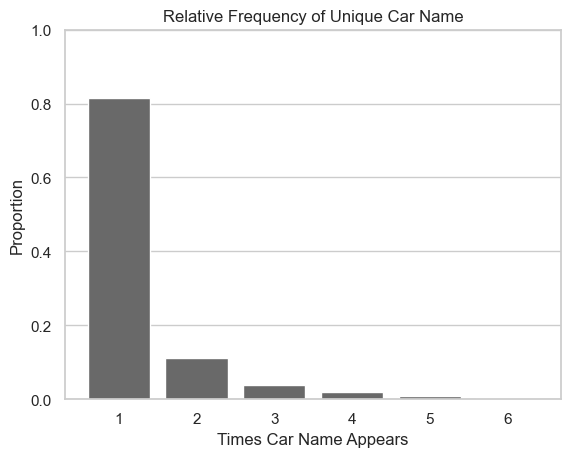

In [38]:
counts = data['car name'].value_counts()
proportions = counts.value_counts(normalize=True)
x = sorted(counts.unique())

plt.bar(x, proportions, color='dimgray')
plt.ylim((0, 1))
plt.grid(axis='x')
plt.xticks(x)

plt.xlabel('Times Car Name Appears')
plt.ylabel('Proportion')
plt.title('Relative Frequency of Unique Car Name')

plt.show()
plt.close()

We see about 80% of the data has a unique car name. Nothing too interesting or unusual here. I think it's time to move on to pairwise EDA analysis.

1. Some car names are similar, such as 'toyota corona' and 'toyota corona hardtop'. It might make sense to combine some of these in a single non-unique name.

2. The car brand name is important to a lot of people. This might influence how manufacturer's choose to improve their newer models ('Can we get away with substituting a less powerful engine if everyone wants a Ferrari?')